In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
import annotations
labels = annotations.getLabels()
label = labels[0]
img = cv2.imread(r"/Users/jeffxie/Desktop/Aircraft Recognition/data-set/airplane-dataset-trans/"+label['label']+"/" + label['name'])

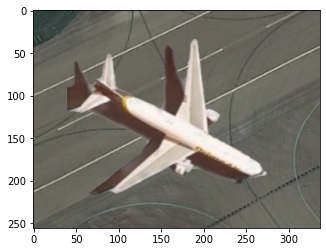

In [3]:
plt.imshow(img)
plt.show()

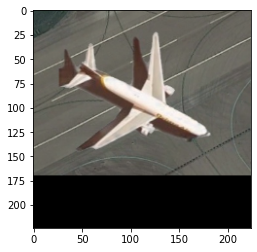

In [4]:
def resize(img, dest_height=224 , dest_width=224):
    height, width = img.shape[:2]
    right = bottom = 0
    if(height > width):
        right = height - width
    else:
        bottom = width - height
    img_square = cv2.copyMakeBorder(img, 0, bottom, 0, right, cv2.BORDER_CONSTANT, None, [0,0,0])
    res = cv2.resize(img_square, (dest_height,dest_width))
    return res
plt.imshow(resize(img))
plt.show()

Origin Image:


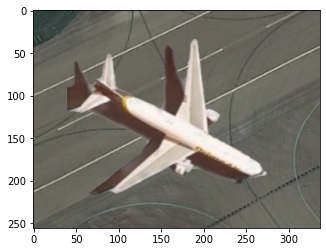

Gray Image:
(256, 337)


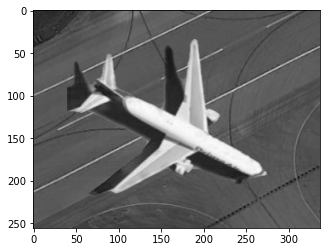

Gaussian Blur:


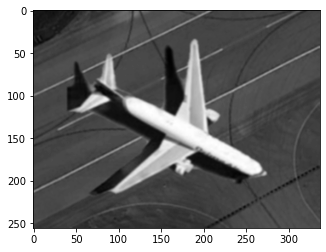

Image 1:


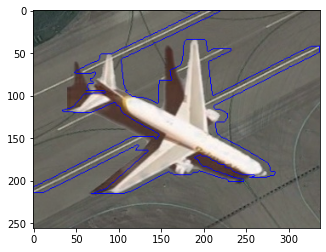

Edge:


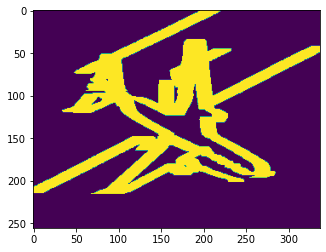

In [5]:
print("Origin Image:")
plt.imshow(img)
plt.show()

img1 = img.copy()
img2 = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Gray Image:")
print(img_gray.shape)
plt.imshow(img_gray, cmap ='gray')
plt.show()

img_gaussian = cv2.GaussianBlur(img_gray, (3, 3), 1)
print("Gaussian Blur:")
plt.imshow(img_gaussian, cmap ='gray')
plt.show()

edge = cv2.Canny(img_gaussian, 100, 300)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
edge = cv2.dilate(edge, kernel, iterations=2) #横向的形态学膨胀

#寻找轮廓
contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img1, contours, -1, (0,0,255))

#轮廓拟合
num = len(contours)
for i in range(num):
    area = cv2.contourArea(contours[i], oriented=False)
    if 30 < area < 8000:  #限定轮廓的面积
        rect = cv2.boundingRect(contours[i])
        cv2.rectangle(img2, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (0, 255, 0))


print("Image 1:")
plt.imshow(img1)
plt.show()
print("Edge:")
plt.imshow(edge)
plt.show()

origin image:


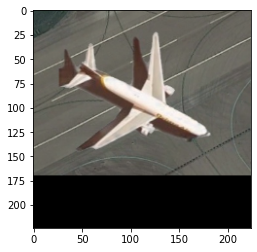

image with anotations:


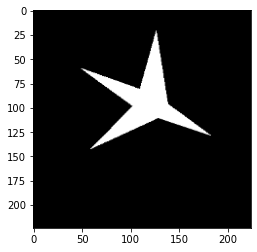

True

In [6]:
img_with_anotations = np.zeros(img.shape[:2])
points = np.array(label['points'])
cv2.fillPoly(img_with_anotations, [points], 255)
img_with_anotations = resize(img_with_anotations)
print('origin image:')
plt.imshow(resize(img))
plt.show()
print('image with anotations:')
plt.imshow(img_with_anotations, cmap ='gray')
plt.show()
cv2.imwrite('/Users/jeffxie/Downloads/anno.png', img_with_anotations)

In [7]:
def rotate(ps,m):
    pts = np.float32(ps)#.reshape([-1, 2])  # 要映射的点
    pts = np.hstack([pts, np.ones([len(pts), 1])]).T
    target_point = np.dot(m, pts)
    target_point = [[target_point[0][x],target_point[1][x]] for x in range(len(target_point[0]))]
    return np.array(target_point).astype(np.int32)

def rotate_img_and_point(img,points,angle,center_x,center_y,resize_rate=1.0):
    h,w,c = img.shape
    M = cv2.getRotationMatrix2D((center_x,center_y), angle, resize_rate)
    res_img = cv2.warpAffine(img, M, (w, h))
    out_points = rotate(points,M)
    return res_img,out_points

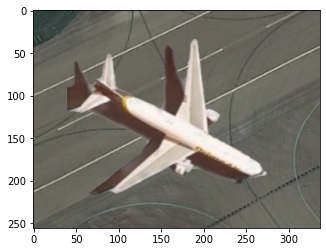

[[283  54]
 [203  67]
 [110   0]
 [156  81]
 [ 69 123]
 [167 107]
 [167 200]
 [207  92]]
origin image:


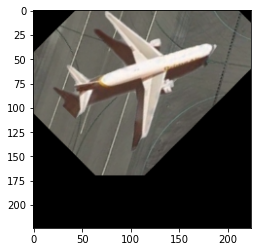

image with anotations:


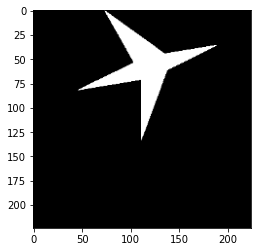

In [8]:
points = np.array(label['points'])
plt.imshow(img)
plt.show()
img, points = rotate_img_and_point(img, points, 45, 112, 112)
print(points)
img_with_anotations = np.zeros(img.shape[:2])
cv2.fillPoly(img_with_anotations, [points], 255)
img_with_anotations = resize(img_with_anotations)
print('origin image:')
plt.imshow(resize(img))
plt.show()
print('image with anotations:')
plt.imshow(img_with_anotations, cmap ='gray')
plt.show()